# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Для начала импортируем бибилиотеки, которые пригодятся нам в дальнейшем.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Далее прочитаем данные и посмотрим на них. Выведем первые пять строк командой head().

In [2]:
sale_of_flats = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
sale_of_flats.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Также в информации указано, что мы имеем в данных 22 колонки, а в таблице мы видим всего 20. Как называются остальные столбцы мы можем увидеть через метод info() и в выборке Series.

Посмотрим общие данные по таблице методом info(), чтобы посмотреть, какие типы данных присутствуют в колонках. 

In [3]:
sale_of_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Мы видим, что не во всех колонках одинаковое количество строк. Это говорит о присутствии пропущенных значений во многих колонках. Так как это данные с сервиса Яндекс.Недвижимость, то наличие пропущенных данных в тех стобцах, которые были заполнены пользователем, может быть обусловлено тем, что создатель объявления заполнял не все строки. А в тех столбцах, которые были заполнены на основе картографических данных, может из-за сбоя каких-либо программ.

Так как объявлений о продаже очень много, то есть вероятность, что несколько квартир находятся в одном и том же доме. А также они могут быть в типовых домах, с одинаковыми параметрами от одного застройщика. Посмотрим как можно установить однотипные дома и заполним пропуски такими же значениями.

### Шаг 2. Предобработка данных

In [4]:
sale_of_flats.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проанализируем каждый столбец с пропусками, чтобы определить их причину. 

Первый столбец 'ceiling_height'(высота потолков): в этом столбце не может быть пропусков, потому, что в любой квартире будет высота потолков. Скорее всего, этоот параметр просто не заполнили на Яндекс.Недвижимость. Чтобы поподробнее определить что содержится в этом столбце, применим метод describe().

In [5]:
sale_of_flats['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В столбце присутствуют подозрительные значения, такие как максимальное значение 100. Так как 75% данных меньше значения 2.8, делаем вывод, что либо это 33-этажный дом без этажей, либо это ошибка.

Чтобы убедиться можем ли мы произвести замену пропущенных значений на медианное значение столбца посмотрим гистограмму с изначальными значениями и уже с замененными.

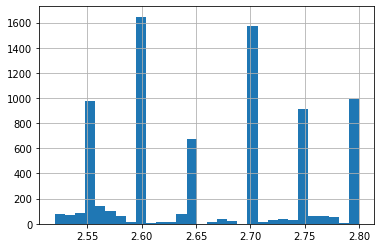

In [6]:
sale_of_flats['ceiling_height'].hist(bins=30, range=(sale_of_flats['ceiling_height'].describe()['25%'], sale_of_flats['ceiling_height'].describe()['75%']))

Для проверки правильности замены данных, заменим пропущенные значения на медиану(квантиль), потому, что высоты потолков +- везде близки по значениям. И посмотрим на гистограмму, которая вышла.

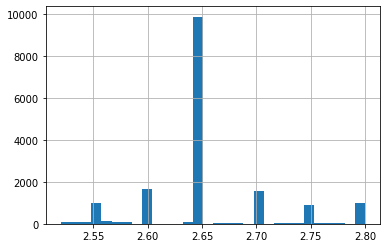

In [7]:
sale_of_flats['ceiling_height'].fillna(2.65).hist(bins=30, range=(sale_of_flats['ceiling_height'].describe()['25%'], sale_of_flats['ceiling_height'].describe()['75%']))

В изначальных данных столбец 2.65 был меньше, чем 2.70 и 2.60, а сейчас он больше всех из-за того, что пропущенных значений очень много. Получается мы изменяем исходные данные. 

Обычно, высота домов нормирована. Исходя из этого, можем взять дома с таким же количеством этажей

Найдем медианное значение высоты потолков для домов, с одинаковым колличеством этажей.

In [8]:
height_by_floors = sale_of_flats.groupby('floors_total').agg({'ceiling_height': "median"})
height_by_floors

,ceiling_height
floors_total,
1.0,2.80
2.0,2.70
3.0,2.80
4.0,3.00
5.0,2.55
6.0,3.00
7.0,3.00
8.0,2.80
9.0,2.55


Мы видим, что 33 этаж имеет пропущенное значение. Заменим его на медианное значение всего столбца.

In [9]:
height_by_floors = height_by_floors.fillna(height_by_floors['ceiling_height'].median())
height_by_floors

,ceiling_height
floors_total,
1.0,2.80
2.0,2.70
3.0,2.80
4.0,3.00
5.0,2.55
6.0,3.00
7.0,3.00
8.0,2.80
9.0,2.55


Создадим функцию, которая будет заменять пропущенное значение в столбце дф sale_of_flats 'ceiling_height' на значение высоты потолков в дф height_by_floors. 

Создадим переменную, на которую будем заменять в случаях, когда не найдется подходящих значений.

In [10]:
second_chance = sale_of_flats['ceiling_height'].median()

Создадим функцию, которая в случае отсутствия пропущенных значений, оставит то значение, которое и было. Если значение этажей совпадет с этажами в нужном нам для замены доме, то он вернет значение из нового дф, со средними значениями по этажам. И в случае, если не подберутся заданные нами условия, то он вернет просто среднее значение по столбцу.

In [11]:
def height_func(row):
    if not np.isnan(row['ceiling_height']):
        return row['ceiling_height']
    for floors in height_by_floors.index.values:
        if row['floors_total'] == floors:
            return height_by_floors[height_by_floors.index == floors]['ceiling_height'].values[0]
        return second_chance

sale_of_flats['ceiling_height'] = sale_of_flats.apply(height_func, axis=1)

Проверим работу функции.

In [12]:
sale_of_flats['ceiling_height'].isna().sum()

0

Пропущенные значения отсутствуют.

Следующий столбец 'floors_total'(Всего этажей в доме).

In [13]:
sale_of_flats['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [14]:
miss_totalfloors = 86/23699
print('Берем во внимание, что пропущенных значений в этом столбце: {:.2%}'. format(miss_totalfloors))

Берем во внимание, что пропущенных значений в этом столбце: 0.36%


Исходя из малого количества пропусков мы можем заменить пропущенные значения на медианное значение, а если квартира будет на этаже выше, чем полученное значение, то мы заполним пропущенное значение равное этажу этой квартиры. Таким образом у нас будет полный набор данных для последующего анализа и не будет потерь в качестве исследования, потому, что погрешность мала. 

Также изменим тип столбца 'floors_total' с float на int, потому,что этаж может быть только целочисленным значением.

In [15]:
sale_of_flats['floors_total'] = sale_of_flats['floors_total'].fillna(sale_of_flats['floors_total'].median())
sale_of_flats['floors_total'] = sale_of_flats['floors_total'].astype('int')

In [16]:
f = 0
while f < sale_of_flats.shape[0]:
    floor = sale_of_flats.loc[f, 'floor']
    total_f = sale_of_flats.loc[f, 'floors_total']
    if floor > total_f:
        sale_of_flats['floors_total'] = sale_of_flats['floors_total'].replace(total_f, floor)
    f += 1    

Проверим как сработал цикл, путем проверки существования значений всего этажей в доме, меньше, чем этаж, на котором находится квартира.

In [17]:
print(sale_of_flats.query('floors_total < floor'))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


Таких значений не существует, значит все значения в этом столбце соответствуют логике и здравому смыслу.

В столбце 'balcony', если отсутствует значение в ячейке, то соответственно и в квартире балкон отсутствует тоже. Заменим методом fillna() пропущенные значения на 0, а также заменим на тип 'int', потому что это только целочисленное значение.

In [18]:
sale_of_flats['balcony'] = sale_of_flats['balcony'].fillna(0)
sale_of_flats['balcony'] = sale_of_flats['balcony'].astype('int')

Также у нас присутствует два столбца с типом данных bool это 'studio' и 'open_plan', но по логике так же с этим типом должен быть и столбец 'is_apartment', потому, что на параметры 'свободная планировка', 'аппартаменты' и 'квартира-студия' может быть ответ только 'Да' или 'Нет'. Поэтому мы заменим сначала тип данных у 'is_apartment', а потом заменим пропущенные значения на 'False' потому, что если этих значений нет, стало быть из-за отсутствия их и не заполнили.

In [19]:
sale_of_flats['is_apartment'] = sale_of_flats['is_apartment'].astype('bool')

In [20]:
sale_of_flats['is_apartment'] = sale_of_flats['is_apartment'].fillna(False)
sale_of_flats['studio'] = sale_of_flats['studio'].fillna(False)
sale_of_flats['open_plan'] = sale_of_flats['open_plan'].fillna(False)

Далее заменим тип столбца 'first_day_exposition' с object на дату методом to_datetime(). Мы не устанавливаем параметр времени, потому, что в главной таблице время не указано, только день.

In [21]:
sale_of_flats['first_day_exposition'] = pd.to_datetime(sale_of_flats['first_day_exposition'], format='%Y.%m.%d')

Так как квартиры типовые, а в столбце с общей площадью нет пропусков, то заполним пропуски в столбцах с площадью кухни и жилой площадью теми же значениями, что и у квартир с такой же общей площадью.

In [22]:
area = sale_of_flats[['total_area', 'living_area', 'kitchen_area']]

Создадим сводную таблицу со всеми значениями, которые нам нужны.

In [23]:
area_med = (
    sale_of_flats
    .pivot_table(index='total_area', values=['living_area', 'kitchen_area'], aggfunc='median')
)

Создадим переменные cредних значений.

In [24]:
living_med = area_med['living_area'].median()

In [25]:
kitchen_med = area_med['kitchen_area'].median()

Воспользуемся той же функцией, что и для замены высоты потолков.
Сначала для жилой зоны.

In [26]:
def living_func(row):
    if not np.isnan(row['living_area']):
        return row['living_area']
    for area_liv in area_med.index.values:
        if row['total_area'] == area_liv:
            return area_med[area_med.index == area_liv]['living_area'].values[0]
        return living_med
        
sale_of_flats['living_area'] = sale_of_flats.apply(living_func, axis=1)

Проделаем то же самое со столбцом площади кухни.

In [27]:
def kitchen_func(row):
    if not np.isnan(row['kitchen_area']):
        return row['kitchen_area']
    for area_liv in area_med.index.values:
        if row['total_area'] == area_liv:
            return area_med[area_med.index == area_liv]['kitchen_area'].values[0]
        return kitchen_med
        
sale_of_flats['kitchen_area'] = sale_of_flats.apply(kitchen_func, axis=1)

Так как в столбце с названием населенного пунтка очень мало значений, мы можем заменить его на отвлеченное значение, не связанное ни с чем. В данном случае, как мне кажется это значение - г. Санкт- Петербург, этот город, как медиана в данном столбце, потому, как большинство объявлений размещены в нем.

In [28]:
sale_of_flats['locality_name'] = sale_of_flats['locality_name'].fillna('Санкт-Петербург')

Той же схемой заполним пропущенные значения в столбце расстояния от центра города.

In [29]:
center_med = (
    sale_of_flats
    .pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc='median')
)

In [30]:
cityCenters_med = sale_of_flats['cityCenters_nearest'].median()

In [31]:
def cityCenters_func(row):
    if not np.isnan(row['cityCenters_nearest']):
        return row['cityCenters_nearest']
    for cityname in sale_of_flats.index.values:
        if row['locality_name'] == cityname:
            return sale_of_flats[sale_of_flats.index == cityname]['cityCenters_nearest'].values[0]
        return cityCenters_med
        
sale_of_flats['cityCenters_nearest'] = sale_of_flats.apply(cityCenters_func, axis=1)

In [32]:
sale_of_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23698 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

Проверим все ли значения на своих местах.

In [33]:
sale_of_flats.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                1
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest         0
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [34]:
sale_of_flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,40.1,9,True,...,11.55,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод по предобработке данных

Мы заполнили все пропуски, что смогли. Пропущенные значения в расположении квартиры или в ее площади мы не можем заполнить, так как эти значения нельзя достоверно вывести из других. Мы заменили типы данных на подходящие, сделали столбец 'first_day_exposition' более читаемым, заменили пропуски. На этом заканчиваем этап предобработки данных и переходим к анализу. В столбцах, полученных с помощью картографических данных у нас не получится произвести замену, потому, что мы не знаем даже примерных параметров, на которые их можно заменить. Оставим эти столбцы с пустыми значениями.

### Шаг 3. Посчитайте и добавьте в таблицу

Первый параметр, который мы посчитаем - это цена за 1 метр квадратный метр.
Вычисляется она по простой формуле: разделим цену квартиры на ее площадь.

In [35]:
sale_of_flats['price_per_meter']  = sale_of_flats['last_price'] / sale_of_flats['total_area']

Далее происходит добавление трех столбцов со значениями дня недели, месяца и года публикации объявления.

In [36]:
sale_of_flats['weekday_exposition'] = sale_of_flats['first_day_exposition'].dt.weekday

Так как dt.weekday возвращает нам дни недели не в названиях, а в числах, нам необходимо сменить цифры на дни недели. Где 0=понедельник, а 6=воскресенье, остальное в соответствии.
Для замены создадим функцию.

In [37]:
def week(sale_of_flats):
    if sale_of_flats['weekday_exposition'] == 0:
        return 'Понедельник'
    elif sale_of_flats['weekday_exposition'] == 1:
        return 'Вторник'
    elif sale_of_flats['weekday_exposition'] == 2:
        return 'Среда'
    elif sale_of_flats['weekday_exposition'] == 3:
        return 'Четверг'
    elif sale_of_flats['weekday_exposition'] == 4:
        return 'Пятница'
    elif sale_of_flats['weekday_exposition'] == 5:
        return 'Суббота'
    elif sale_of_flats['weekday_exposition'] == 6:
        return 'Воскресенье'
   
sale_of_flats['weekday_exposition'] = sale_of_flats.apply(week, axis = 1)

Проверим выполнение функции week.

In [38]:
sale_of_flats['weekday_exposition'].value_counts()

Четверг        4295
Вторник        4183
Пятница        4000
Среда          3974
Понедельник    3612
Суббота        1936
Воскресенье    1699
Name: weekday_exposition, dtype: int64

Теперь столбец с месяцем публикации.

In [39]:
sale_of_flats['mounth_exposition'] = pd.DatetimeIndex(sale_of_flats['first_day_exposition']).month

In [40]:
def month(sale_of_flats):
    if sale_of_flats['mounth_exposition'] == 0:
        return 'Январь'
    elif sale_of_flats['mounth_exposition'] == 1:
        return 'Февраль'
    elif sale_of_flats['mounth_exposition'] == 2:
        return 'Март'
    elif sale_of_flats['mounth_exposition'] == 3:
        return 'Апрель'
    elif sale_of_flats['mounth_exposition'] == 4:
        return 'Май'
    elif sale_of_flats['mounth_exposition'] == 5:
        return 'Июнь'
    elif sale_of_flats['mounth_exposition'] == 6:
        return 'Июль'
    elif sale_of_flats['mounth_exposition'] == 7:
        return 'Август'
    elif sale_of_flats['mounth_exposition'] == 8:
        return 'Сентябрь'
    elif sale_of_flats['mounth_exposition'] == 9:
        return 'Октябрь'
    elif sale_of_flats['mounth_exposition'] == 10:
        return 'Ноябрь'
    elif sale_of_flats['mounth_exposition'] == 11:
        return 'Декабрь'
   
sale_of_flats['mounth_exposition'] = sale_of_flats.apply(month, axis = 1)

In [41]:
sale_of_flats['mounth_exposition'].value_counts()

Март        2640
Апрель      2587
Май         2379
Декабрь     2371
Ноябрь      2127
Октябрь     1981
Июль        1760
Сентябрь    1744
Август      1695
Февраль     1500
Июнь        1274
Name: mounth_exposition, dtype: int64

И в дополнение ко всем данным добавим столбец с годом публикации таким же методом, как и столбец с днями недели.

In [42]:
sale_of_flats['year_exposition'] = sale_of_flats['first_day_exposition'].dt.year

И посмотрим какие года публикации у нас в данных присутствуют.

In [43]:
sale_of_flats['year_exposition'].value_counts()

2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: year_exposition, dtype: int64

Добавим в таблицу определение этажа. Он может быть трех видов: первый, последний и другой. Создадим функцию, которую применим к столбцу 'floor'. Применяем метод apply ко всему дф, а не к отдельному столбцу, чтобы можно было обращаться к столбцам внутри функции. А параметр axis=1 указывает, что применение функции происходит по колонке.

In [44]:
def floor_parameter(sale_of_flats):
    if sale_of_flats['floor'] == 1:
        return 'Первый'
    elif sale_of_flats['floor'] == sale_of_flats['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

sale_of_flats['floor_group'] = sale_of_flats.apply(floor_parameter, axis = 1)

Проверим выполнение функции floor_parameter.

In [45]:
sale_of_flats['floor_group'].value_counts()

Другой       17972
Первый        2917
Последний     2810
Name: floor_group, dtype: int64

Для дальнейшего анализа нам необходимо расчитать еще два параметра. А именно, соотношение жилой площади к общей площади.

In [46]:
sale_of_flats['living_to_total'] = sale_of_flats['living_area'] / sale_of_flats['total_area']

И соотношение кухни к общей площади.

In [47]:
sale_of_flats['kitchen_to_total'] = sale_of_flats['kitchen_area'] / sale_of_flats['total_area']

Также, столбцы со стоимостью имеют знаки после запятой, но так как речь идет о больших суммах, то можно преобразовать тип данных на int, чтобы данные не выглядели громоздко.

In [48]:
sale_of_flats['last_price'] = sale_of_flats['last_price'].astype('int')
sale_of_flats['price_per_meter'] = sale_of_flats['price_per_meter'].astype('int')

Мы расчитали все необходимые значения и добавили их в таблицу.

In [49]:
sale_of_flats.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,mounth_exposition,year_exposition,floor_group,living_to_total,kitchen_to_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,2.0,755.0,NaN,120370,Четверг,Апрель,2019,Другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,0.0,NaN,81.0,82920,Вторник,None,2018,Первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,2.0,574.0,558.0,92785,Четверг,Сентябрь,2015,Другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14,40.10,9,True,...,3.0,234.0,424.0,408176,Пятница,Август,2015,Другой,0.252201,0.072642
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,1.0,48.0,121.0,100000,Вторник,Июль,2018,Другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,24,14.40,5,True,...,NaN,NaN,55.0,95065,Понедельник,Октябрь,2018,Другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,0.0,NaN,155.0,99195,Четверг,Декабрь,2017,Другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.65,24,40.10,22,True,...,0.0,NaN,NaN,110544,Четверг,Май,2019,Другой,0.560056,0.263966
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,NaN,NaN,189.0,87454,Среда,Июнь,2018,Другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,24,43.60,7,True,...,0.0,NaN,289.0,88524,Воскресенье,Март,2017,Другой,0.714754,0.106557


Таким образом мы получили все необходимые для исследования дополнительные данные. Нам теперь известны все сведения о публикациях и о самих квартирах. Мы расширили данный датафрейм на 7 столбцов. Получили определенные параметры квартиры, такие как соотношение площадей и цена за квадратный метр. Данные преобразованы и готовы к дальнейшей обработке и изучению.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### 4.1. Изучение следующих параметров: площадь, цена, число комнат, высота потолков. Построение гистограммы для каждого параметра.

Сделаем выборку из общего датафрейма.

In [50]:
general_parameter = sale_of_flats[['total_area', 'price_per_meter', 'rooms', 'ceiling_height']]
general_parameter.head()

,total_area,price_per_meter,rooms,ceiling_height
0,108.0,120370,3,2.70
1,40.4,82920,1,2.65
2,56.0,92785,2,2.65
3,159.0,408176,3,2.65
4,100.0,100000,2,3.03


Напишем цикл, позволяющий автоматически строить гистограммы. А также, создадим словарь названия гистограмм, чтобы можно было автоматически присвоить им название. Ранг гистограммы установим между 5 и 95 персентилем, чтобы избежать выбросов при анализе.

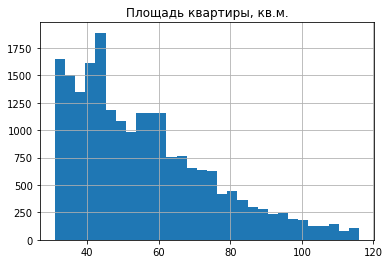

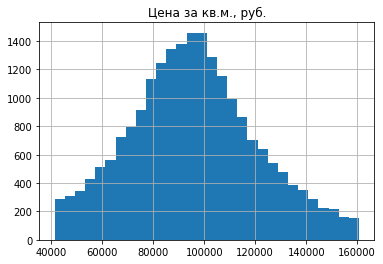

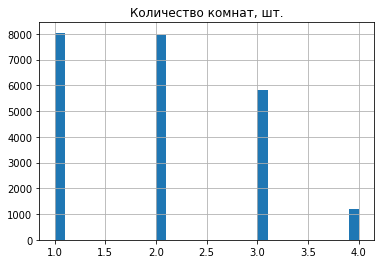

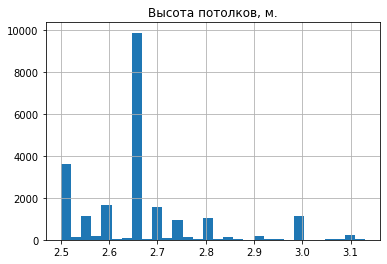

In [51]:
number = 0
for row in general_parameter:
    new_dict = ['Площадь квартиры, кв.м.', 'Цена за кв.м., руб.', 'Количество комнат, шт.', 'Высота потолков, м.']
    general_parameter[row].hist(bins=30, range=(np.percentile(general_parameter[row], 5, axis=0), np.percentile(general_parameter[row], 95, axis=0)))
    plt.title(new_dict[number])
    number += 1
    plt.show()

    Мы видим, что из этих четырех значений зависимость количества продаж от этих параметров наблюдается только в первых 
    двух: в общей площади и цене. 

Больше всего объявлений о продаже квартир с маленькой площадью. Чем больше площадь, тем меньше вариантов. Можем предположить, что у людей в принципе во владении оказывается квартира с площадью меньше средней, потому, что процент людей, которые могут себе позволить квартиру побольше, гораздо меньше. Также мы наблюдаем пики на 45 и 60 кв.м. Можно сделать вывод, что эти квартиры находятся в зданиях, которые строят популярные застройщики и у них стандартные площади квартир по всему городу.

В гистограмме цены за квадратный метр наблюдается нормальное распределение. Это связано с тем, что обычно на рынке недвижимости есть стандартная цена за квадратный метр. Конечно она может быть с отклонениями, но большинство все таки придерживаются близких цен, иначе, если завысить, то никто не будет покупать, а если занизить - это уже демпинг, что не законно.

По гистограмме количество комнат та же самая история. Продают квартиры с меньшим кол-вом комнат чаще, чем с большим.

А по высоте потолков мы видим, что превалируют значения 2.65. Что говорит о том, что при строительстве жилых зданий это типовой вариант, количество которого во много раз превышает все остальные значения. 

#### 4.2. Изучение времени продажи квартиры. Построение гистограммы. Расчет среднего и медианы. Описание того, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Для визуализации этих расчетов мы сделаем выборку со значениями, которые описывают параметры размещенного объявления.

In [52]:
parameter_of_exposition = sale_of_flats[['first_day_exposition', 'days_exposition']]
parameter_of_exposition.head(10)

,first_day_exposition,days_exposition
0,2019-03-07,NaN
1,2018-12-04,81.0
2,2015-08-20,558.0
3,2015-07-24,424.0
4,2018-06-19,121.0
5,2018-09-10,55.0
6,2017-11-02,155.0
7,2019-04-18,NaN
8,2018-05-23,189.0
9,2017-02-26,289.0


Посмотрим параметры столбца 'days_exposition' с помощью функции describe(). Посмотрим на среднее и на медиану этого столбца.

In [53]:
parameter_of_exposition['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Мы видим, что большая часть объявлений(75%) были выставлены в пределах 232 дней. И есть какие то выбивающиеся значения, которые выбываются из квартилей, они висели на Яндекс.Недвижимость примерно 5 лет или 1 день, например.

Построим гистограмму столбца с количеством дней продажи.

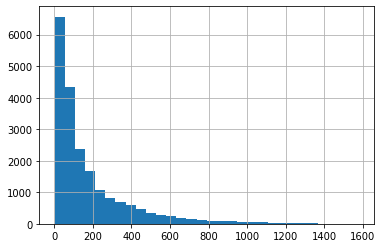

In [54]:
parameter_of_exposition['days_exposition'].hist(bins=30)

Посмотрим эту же гистограмму, только в пределах квартилей, для более точечного изучения.

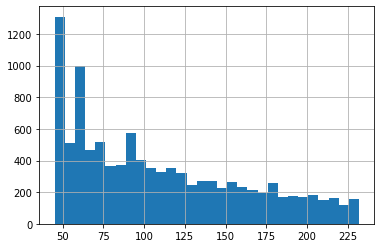

In [55]:
parameter_of_exposition['days_exposition'].hist(bins=30, range=(sale_of_flats['days_exposition'].describe()['25%'], sale_of_flats['days_exposition'].describe()['75%']))

По гистограмме мы видим, что большинство квартир продаются в короткие сроки (до 232 дней). Далее гораздо меньше обьявлений растягиваются с продажей надолго. Тогда получается, что квартиль 75% будет сроком обычной продажи.

На второй гистограмме мы видим 3 пика. На описании столбца командой describe() мы видим, что медиана столбца это 95 дней, там же, где и заканчивается 3 пик. Можно сказать, что медиана столбца и будет сроком быстрой продажи.

#### 4.3. Уберём редкие и выбивающиеся значения.

Сделаем выборку столбцов, которые мы хотим обработать, для дальнейшего изучения. И столбцы, которые наиболее подвержены для изменения мошенниками.

Чтобы визуально было понятнее смотреть на столбец last_price заменим значения рубли на миллионы рублей. При этом цену за метр квадратный оставим в рублях, потому, что значения там меньше значительно, а зависимости мы не ищем, поэтому значения стандартизировать не обязательно.

In [56]:
sale_of_flats['last_price_mil'] = sale_of_flats['last_price'] / 1000000

In [57]:
find_blowout = sale_of_flats[['price_per_meter', 'ceiling_height', 'last_price_mil', 'total_area', 'floors_total', 'floor', 'living_area', 'kitchen_area', 'cityCenters_nearest']]

In [58]:
find_blowout

,price_per_meter,ceiling_height,last_price_mil,total_area,floors_total,floor,living_area,kitchen_area,cityCenters_nearest
0,120370,2.70,13.000,108.00,16,8,51.0,25.00,16028.0
1,82920,2.65,3.350,40.40,11,1,18.6,11.00,18603.0
2,92785,2.65,5.196,56.00,5,4,34.3,8.30,13933.0
3,408176,2.65,64.900,159.00,14,9,40.1,11.55,6800.0
4,100000,3.03,10.000,100.00,14,13,32.0,41.00,8098.0
...,...,...,...,...,...,...,...,...,...
23694,72490,3.70,9.700,133.81,5,3,73.3,13.83,4232.0
23695,52542,2.65,3.100,59.00,5,4,38.0,8.50,13098.5
23696,44091,2.65,2.500,56.70,3,1,29.7,11.55,13098.5
23697,149511,3.00,11.475,76.75,17,12,40.1,23.30,10364.0


In [59]:
find_blowout.describe()

,price_per_meter,ceiling_height,last_price_mil,total_area,floors_total,floor,living_area,kitchen_area,cityCenters_nearest
count,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23698.000000,23699.000000
mean,9.942121e+04,2.724453,6.541549,60.348651,13.816448,5.892358,34.910910,10.663988,13936.792797
std,5.030681e+04,0.988299,10.887013,35.654083,8.518951,4.885249,21.182958,5.621979,7553.779633
min,1.110000e+02,1.000000,0.012190,12.000000,1.000000,1.000000,2.000000,1.300000,181.000000
25%,7.658500e+04,2.600000,3.400000,40.000000,5.000000,2.000000,19.000000,7.400000,10927.000000
50%,9.500000e+04,2.650000,4.650000,52.000000,14.000000,4.000000,31.100000,10.000000,13098.500000
75%,1.142560e+05,2.700000,6.800000,69.900000,24.000000,8.000000,41.100000,11.550000,15248.500000
max,1.907500e+06,100.000000,763.000000,900.000000,60.000000,33.000000,409.700000,112.000000,65968.000000


Для очистки датафрейма от выбросов нам необходимо воспользоваться функцией percentille(). Но из-за пропущенных значений в столбцах воспользуемся методом nanpercentille(), и выберем все значения столбцов, до значения nanpercentille(95%), чтобы оставшиеся 5% мы могли отметить как выбросы.

Посмотрим как работает метод nanpercentille().

In [60]:
find_blowout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 9 columns):
price_per_meter        23699 non-null int64
ceiling_height         23699 non-null float64
last_price_mil         23699 non-null float64
total_area             23699 non-null float64
floors_total           23699 non-null int64
floor                  23699 non-null int64
living_area            23699 non-null float64
kitchen_area           23698 non-null float64
cityCenters_nearest    23699 non-null float64
dtypes: float64(6), int64(3)
memory usage: 1.6 MB


In [61]:
out = np.nanpercentile(find_blowout, q = 75, axis = 0)
out

array([1.14256e+05, 2.70000e+00, 6.80000e+00, 6.99000e+01, 2.40000e+01,
       8.00000e+00, 4.11000e+01, 1.15500e+01, 1.52485e+04])

Значения совпадают с методом describe(). Значит можно его применить при дальнейших расчетах.

In [62]:
blowout_limit_list = np.nanpercentile(find_blowout, q = 95, axis = 0)
blowout_limit_list

array([1.607163e+05, 3.130000e+00, 1.530000e+01, 1.160000e+02,
       2.500000e+01, 1.600000e+01, 6.700000e+01, 1.960000e+01,
       3.059410e+04])

Зададим дф, который будет содержать названия колонок дф find_blowout.

In [63]:
find_blowout_columns = find_blowout.columns

Напишем цикл, который посчитает и выведет значения персентилей для каждого столбца и заменит дф find_blowout на значения, которые меньше 95% персентиля.

In [64]:
numb = 0
while numb < len(blowout_limit_list):
    real_column = find_blowout_columns[numb]
    real_blowout_limit = blowout_limit_list[numb]
    print('Значение 95% персентиля для столбца', real_column, real_blowout_limit)
    numb += 1

Значение 95% персентиля для столбца price_per_meter 160716.29999999996
Значение 95% персентиля для столбца ceiling_height 3.13
Значение 95% персентиля для столбца last_price_mil 15.3
Значение 95% персентиля для столбца total_area 116.0
Значение 95% персентиля для столбца floors_total 25.0
Значение 95% персентиля для столбца floor 16.0
Значение 95% персентиля для столбца living_area 67.0
Значение 95% персентиля для столбца kitchen_area 19.6
Значение 95% персентиля для столбца cityCenters_nearest 30594.099999999984


In [65]:
find_blowout = find_blowout.query('price_per_meter <= 160716.29999999996')

In [66]:
find_blowout = find_blowout.query('ceiling_height <= 3.3')

In [67]:
find_blowout = find_blowout.query('last_price_mil <= 15.0')

In [68]:
find_blowout = find_blowout.query('total_area <= 116.0')

In [69]:
find_blowout = find_blowout.query('floors_total <= 25.0')

In [70]:
find_blowout = find_blowout.query('floor <= 16.0')

In [71]:
find_blowout = find_blowout.query('living_area <= 69.0')

In [72]:
find_blowout = find_blowout.query('kitchen_area <= 20')

In [73]:
find_blowout = find_blowout.query('cityCenters_nearest <= 31671.599999999977')

In [74]:
find_blowout.describe()

,price_per_meter,ceiling_height,last_price_mil,total_area,floors_total,floor,living_area,kitchen_area,cityCenters_nearest
count,18701.000000,18701.000000,18701.000000,18701.000000,18701.000000,18701.000000,18701.000000,18701.000000,18701.000000
mean,90572.475376,2.655996,4.767436,52.668078,13.843003,5.226726,31.220916,9.413913,13562.672130
std,28466.235859,0.141195,2.302296,17.642361,8.386050,3.752779,12.239149,2.928671,5158.564281
min,7962.000000,1.000000,0.430000,13.000000,1.000000,1.000000,2.000000,1.300000,287.000000
25%,73529.000000,2.580000,3.253000,39.000000,5.000000,2.000000,18.900000,7.000000,11725.000000
50%,92391.000000,2.650000,4.300000,49.000000,14.000000,4.000000,30.100000,9.000000,13098.500000
75%,108846.000000,2.650000,5.800000,63.000000,24.000000,7.000000,40.100000,11.550000,14971.000000
max,160714.000000,3.300000,15.000000,116.000000,25.000000,16.000000,69.000000,20.000000,31670.000000


Из итоговой таблицы мы можем посмотреть,какие параметры имеет среднестатистическая квартира. Будем смотреть на средние значения столбцов.

- Большинство квартир находятся в домах в 15 этажей, но продают квартиры на низких этажах. Скорее всего, это связано с тем, что людей больше устраивают квартиры на низких этажах, но если квартира находится выше 5 этажа, это уже неплохо.

- Высота потолков получилась 2,6 - 2,7. Ничего особенного. Разброс в значениях высоты потолков не такой вышел и большой(при условии, что мы отсеяли потолки высотой 100 метров). 

- Средняя цена за метр квадратный тоже не вызывает вопросов. 102281 руб. Обычная цена для больших городов.

- Санкт- Петербург большой город, и то, что самые частопродаваемые квартиры находятся в удалении от центра на всего 10 км. При том, что протяженность города с севера на юг 44 км, с запада на восток 25 км, так и выходим расстояние в среднем.

#### 4.4. Какие факторы больше всего влияют на стоимость квартиры? Изучение, зависимости цены от квадратного метра, числа комнат, удалённости от центра. Изучение зависимости цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

Создадим выборку для изучения первого пункта задания.

In [75]:
factors_flat_price = sale_of_flats[['price_per_meter', 'total_area', 'rooms', 'cityCenters_nearest']]
factors_flat_price.head()

,price_per_meter,total_area,rooms,cityCenters_nearest
0,120370,108.0,3,16028.0
1,82920,40.4,1,18603.0
2,92785,56.0,2,13933.0
3,408176,159.0,3,6800.0
4,100000,100.0,2,8098.0


Для наглядного изучения зависимости лучше всего использовать функцию корреляции corr().

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54c6f6d490>,
      dtype=object)

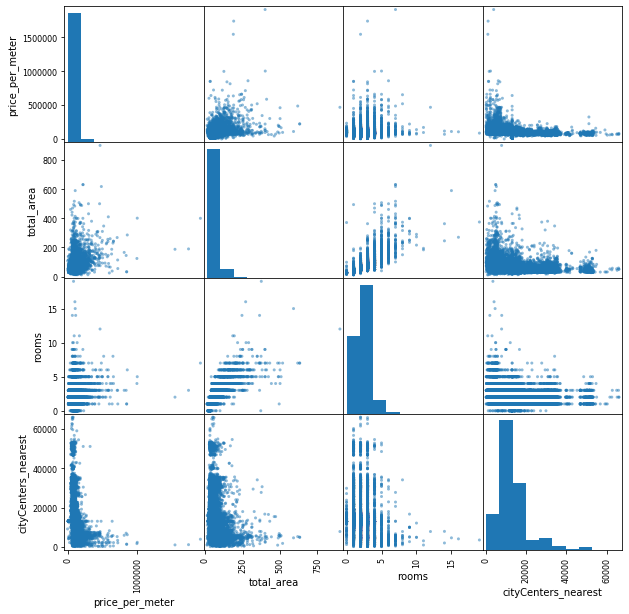

In [76]:
factors_flat_price.corr()
pd.plotting.scatter_matrix(factors_flat_price, figsize=(10,10))

Из расчитанных данных и из графиков попарных точечных диаграмм мы видим, что на цену больше всего влияет цена за квадратный метр, и это прямые зависимости. Площадь это константа, и ее изменение невозможнопо априори. А на третьем месте по влиянию оказалось число комнат. Но все- равно, в любом случае больше учитывается квадрат, а не количество перегородок, грубо говоря.

Все графики в паре с количеством комнат имеют необычную для графика полосчатую структуру. Это связано с тем, что комнат может быть только исключительно целым числом.

Значение удаленности от центра имеет обратную зависимость с ценой за кв.м., но значения настолько маленькими. Но учитывая, что большая квартира в удаленном районе города и маленькая в центре могут иметь одну цену за кв.м., вполне имеет место быть, так как в любом случае больше учитываем общие характеристики квартиры.

Для визуализации матрицы корреляции, создадим тепловую карту из библиотеки Seaborn, где значение меньше, тем темнее(холоднее). На ней мы увидим, где оттенок светлее, тем зависимость больше.

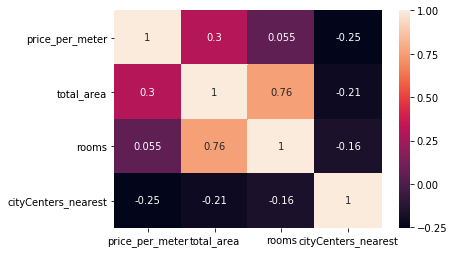

In [77]:
sns.heatmap(factors_flat_price.corr(), annot = True)

Следующим пунтом будет анализ зависимости между ценой квартиры и того, на каком она этаже. Но, что-то мне подсказывает, что результат очевиден, и чем выше этаж, тем дороже квартира. 

In [78]:
flat_floor = sale_of_flats[['price_per_meter', 'floor_group']]

Сгруппируем сводную таблицу по группе этажа, и подставим медианные значения столбца с ценой по этим категориям.

In [79]:
flat_floor = (
    sale_of_flats
    .pivot_table(index='floor_group', values='price_per_meter', aggfunc=['median', 'count'])
)

In [80]:
flat_floor

,median,count
,price_per_meter,price_per_meter
floor_group,,
Другой,98009,17972
Первый,81223,2917
Последний,86250,2810


Из таблицы мы можем видеть, что максимальная цена у этажа 'Другой'. Это связано с тем, что первый этаж не совсем комфортен для жилья. И подъезд получается максимально проходной и сама квартира в темное время суток предстает на всеобщее обозрение. С последним этажом все тоже, вроде как, понятно. Зачастую в разных домах проблема с последним этажом появляется весной, когда крыша начинает таять и потолок протекает. Мало приятного, гораздо удобнее допустим в 16-ти этажном доме взять квартиру на 15-ом этаже. Вид из окна тот же, а с потолком проблем нет. Поэтому, цена на 16-ом этаже будет ниже, чтобы повысить шансы на продажу. Ведь если можно сильно сэкономить, то почему бы и нет?

Разница медианной стоимости между первым и другим 900000, а между другим и последним 600000. Можно сделать вывод, что охотнее всего купят квартиру на последнем или другом этаже, чем на первом(исходя из того, что цена выше там, где людям хочется купить больше). Так же как и охотнее купят квартиру на последнем этаже, чем на первом.

И последний пункт: зависимость от даты размещения.

Для изучения этой зависимости, воспользуемся тем же методом, что и в предыдущем решении.

In [81]:
price_to_exposition = sale_of_flats[['price_per_meter', 'weekday_exposition', 'mounth_exposition', 'year_exposition']]

In [82]:
flat_weekday_exposition = (
    sale_of_flats
    .pivot_table(index='weekday_exposition', values='price_per_meter', aggfunc='median')
)
flat_weekday_exposition

,price_per_meter
weekday_exposition,
Воскресенье,94501.0
Вторник,95634.0
Понедельник,94688.0
Пятница,94616.0
Среда,95473.0
Суббота,93545.5
Четверг,95143.0


Text(0.5, 1.0, 'Зависимость цены за кв.м. от дня выкладывания объявления на сервис')

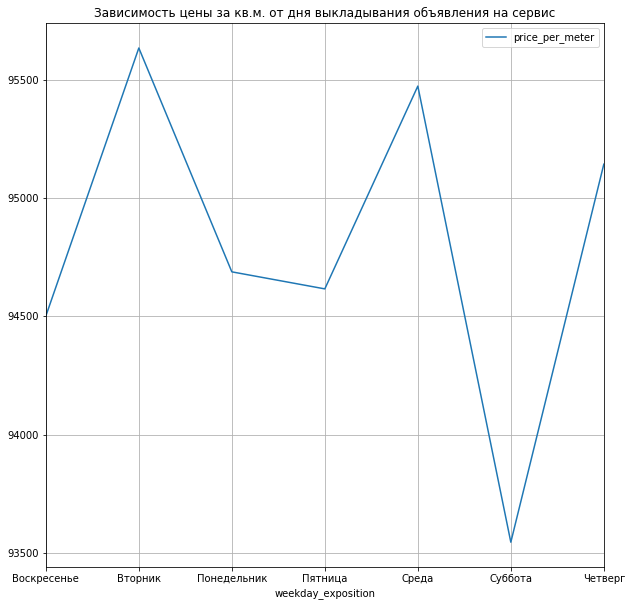

In [83]:
flat_weekday_exposition.plot(grid=True, figsize=(10,10))
plt.title('Зависимость цены за кв.м. от дня выкладывания объявления на сервис')

На самом деле, нет никакой зависимости от того, в какой день недели было размещено объявление. Конечно,есть значения минимальные и максимальные. Разница, между количеством объявлений размещенных в выходной день, чем в будний день большая. Но скорее всего это связано с тем, что в выходные дни люди предпочитают не заниматься деловыыми вопросами. А разница по установленной цене в этом объявлении вообще не устанавливается.

In [84]:
flat_mounth_exposition = (
    sale_of_flats
    .pivot_table(index='mounth_exposition', values='price_per_meter', aggfunc='median')
)
flat_mounth_exposition

,price_per_meter
mounth_exposition,
Август,95000
Апрель,95238
Декабрь,95588
Июль,92799
Июнь,92857
Май,96451
Март,95000
Ноябрь,94202
Октябрь,95607


Text(0.5, 1.0, 'Зависимость цены за кв.м. от месяца выкладывания объявления на сервис')

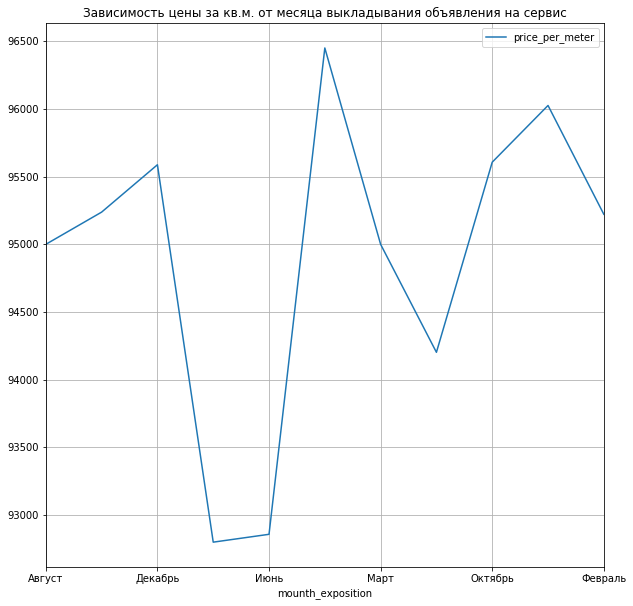

In [85]:
flat_mounth_exposition.plot(grid=True, figsize=(10,10))
plt.title('Зависимость цены за кв.м. от месяца выкладывания объявления на сервис')

График, почему-то, не подписывает столбцы, но можно понять их значение по таблице и мы видим, что они расположены в алфавитном порядке. Так же как и в предыдущей задаче, разница по ценам незначительная и не зависимости никакой не присутствует. В интернете, на большом количестве сайтов говорят, что наиболее благоприятное время для покупки жилья - после Нового года. Говорят это, и не приводят никакой статистики. Сейчас ее мы видим сами. И нет никакой такой зависимости. Самая высокая цена в мае, но летом уже цена падает на самый минимум. Возможно, это также связано с тем, что когда обстановка более менее расслабленная, люди не хотят заниматься деловыми вопросами.

In [86]:
flat_year_exposition = (
    sale_of_flats
    .pivot_table(index='year_exposition', values='price_per_meter', aggfunc='median')
)
flat_year_exposition

,price_per_meter
year_exposition,
2014,107000.0
2015,93414.0
2016,91743.0
2017,92564.5
2018,95689.0
2019,103305.0


Text(0.5, 1.0, 'Зависимость цены за кв.м. от года выкладывания объявления на сервис')

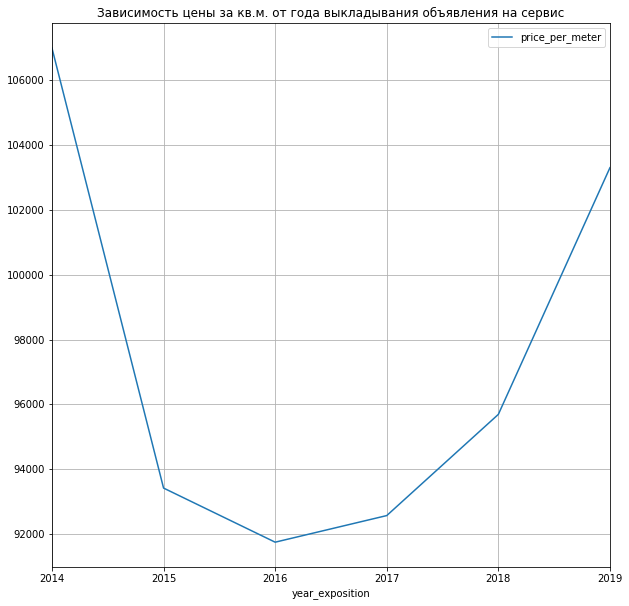

In [87]:
flat_year_exposition.plot(grid=True, figsize=(10,10))
plt.title('Зависимость цены за кв.м. от года выкладывания объявления на сервис')

А вот с годом размещения объявления ситуация значительно интереснее. И логичнее. В разные года в мире разная экономика, а в России из-за обрушения рубля и инфляции экономическая ситуация нестабильная.

Видим, что начиная с 2014 года, когда предложение было низким, а цена высокой, к 2016-ому году ситуация сильно изменилась. Это связано с кризисом 2016-2018 гг. в России. Самая минимальная цена оказалась в 2016 году. Продолжительный кризис, который развивался задолго до 2016 года, привёл к тяжёлому финансовому положению широких слоёв населения. Соответственно у людей не было денег, чтобы покупать жилье. Спрос падал. И цена на жилье резко упала. А продавать стали больше, потому, что думали, что может стать еще хуже. Классическое поведение человека при кризисных ситуациях. Но как мы видим уже в 2019 году ситуация почти стабилизировалась в плане предложения, а цена на жилье стала расти.

#### 4.5. Выберем 10 населённых пунктов с наибольшим числом объявлений. Расчет средней цены квадратного метра в этих населённых пунктах. Выделение населённых пунктов с самой высокой и низкой стоимостью жилья. 

Функцией value_counts() выведем количество объявлений для каждого населенного пункта. Так как количество идет от большего к меньшему выведем первые 10 значений.

In [88]:
locality = sale_of_flats['locality_name'].value_counts().head(10)
locality

Санкт-Петербург      15770
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Мы видим, что Санкт- Петербург обгоняет населенные пункты в десятки раз. Причем интересен и тот факт, что у поселка Мурино и Шушары количество объявлений больше, чем у некоторых городов. Создадим отдельную таблицу, где к этим значениям будут добавлены необходимые нам количество объявлений и цена за кв.м.

In [89]:
(sale_of_flats.groupby('locality_name').agg({'first_day_exposition':'count', 'price_per_meter':'mean'})
    .rename(columns={'first_day_exposition':'count'})
    .sort_values(by='count', ascending=False).head(10)
)

,count,price_per_meter
locality_name,,
Санкт-Петербург,15770,114784.747242
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


Посмотрев на столбец цены за кв.м. мы видим, что, конечно, максимальная цена будет в Санкт- Петербурге. Оно понятно, большой город и.т.д. А на втором месте оказался город Пушкин. Ну во-первых, он всего в 32 км. от СП, а во-вторых, там расположены чуть- ли не главные достопримечательности: это Большой Екатерининский дворец, и, конечно, Царское Село. Почти каждый турист, который приезжает в Питер едет и туда. 

Самая маленькая цена за кв.м.в городе Выборг. Это промышленный центр и там очень много производств. Скорее всего, низкие цены обусловлены там большим количеством производств, а из жилья - много панельных многоэтажек, а также значительным отдалением от СП(10 км.).

#### 4.6. Изучение расположения квартир. Выделите квартиры в Санкт-Петербурге. Определение того, какая область входит в центр. Расчет средней цены для каждого километра. Построение графика зависимости цены от удалённости от центра. 

Для начала изменим тип на int, потому, что с целочисленными значениями удобнее работать, а потом переведем столбец с расстоянием из метров в километры.

In [90]:
sale_of_flats['cityCenters_nearest'] = sale_of_flats['cityCenters_nearest'].astype('int')

In [91]:
sale_of_flats['cityCenters_nearest_km'] = sale_of_flats['cityCenters_nearest'] /1000

Проверил изменился ли тип данных.

In [92]:
sale_of_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 31 columns):
total_images              23699 non-null int64
last_price                23699 non-null int64
total_area                23699 non-null float64
first_day_exposition      23699 non-null datetime64[ns]
rooms                     23699 non-null int64
ceiling_height            23699 non-null float64
floors_total              23699 non-null int64
living_area               23699 non-null float64
floor                     23699 non-null int64
is_apartment              23699 non-null bool
studio                    23699 non-null bool
open_plan                 23699 non-null bool
kitchen_area              23698 non-null float64
balcony                   23699 non-null int64
locality_name             23699 non-null object
airports_nearest          18157 non-null float64
cityCenters_nearest       23699 non-null int64
parks_around3000          18181 non-null float64
parks_nearest             

Выделим из общего дф только строки, где в столбце 'locality_name' присутствует "Санкт-Петербург.

In [93]:
sp = (
    sale_of_flats
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='price_per_meter', aggfunc='mean')
)
print(sp)

                        price_per_meter
cityCenters_nearest_km                 
0.181                          195591.0
0.208                          172619.0
0.215                          109900.0
0.287                           88796.0
0.291                          101321.0
...                                 ...
29.343                          73943.0
29.493                          56976.0
31.813                          47041.0
31.897                          81018.0
41.294                          96029.0

[6314 rows x 1 columns]


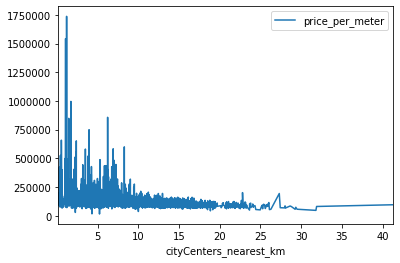

In [94]:
sp.reset_index().plot(x = 'cityCenters_nearest_km', y = 'price_per_meter')

На графике мы видим определенный промежуток, где очень высокая цена и минимальное удаление от центра. Так как не существует конкретного понятия центр города, то оно может быть и размыто. Тут максимальное количество объявлений и с максимальными ценами концентрируется от 8 до 9 км. Получается центр города определяется охватываемым его диаметром около 16-18 км. Также видим на графике, что чем ближе к центру, тем цена возрастает буквально в разы. И это еще обуславливается тем, что в центре СП почти все здания исторические, а чем дальше, тем больше новостроек. Так же мы видим пик на промежутке от 25 до 30 км., но не выше, чем пики в самом начале. Это может быть связано с каким- нибудь элитным районом.

#### 4.7. Выделение сегмента квартир в центре. Анализ этой территории и изучение следующих параметров: площадь, цена, число комнат, высота потолков. Определение факторов, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

Создадим новый дф, чтобы в нем были только нужные для нашего анализа параметры.

In [95]:
general_parameter_2 = sale_of_flats[['total_area', 'price_per_meter', 'rooms', 'ceiling_height', 'cityCenters_nearest_km', 'days_exposition', 'floor']]

In [96]:
flat_in_сenter = general_parameter_2.query('cityCenters_nearest_km < 9')

In [97]:
flat_in_сenter.head()

,total_area,price_per_meter,rooms,ceiling_height,cityCenters_nearest_km,days_exposition,floor
3,159.0,408176,3,2.65,6.800,424.0,9
4,100.0,100000,2,3.03,8.098,121.0,13
24,97.2,66872,2,2.65,2.336,265.0,1
35,149.0,104026,5,2.65,3.502,644.0,4
51,161.0,279503,3,3.20,6.589,541.0,4


Проверим количество пропущенных значений в столбце с параметром объявления. Поэтому мы просто уберем пропущеные значения из этого столбца.

In [98]:
flat_in_сenter['days_exposition'].isna().sum()

707

In [99]:
flat_in_сenter['days_exposition']= flat_in_сenter['days_exposition'].fillna(0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
flat_in_сenter['days_exposition'].isna().sum()

0

Воспользуемся той же функцией, что и в самом начале анализа.

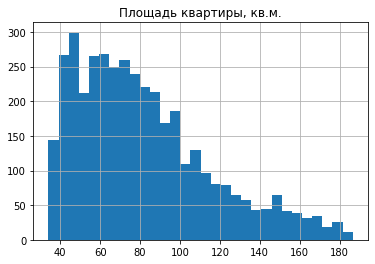

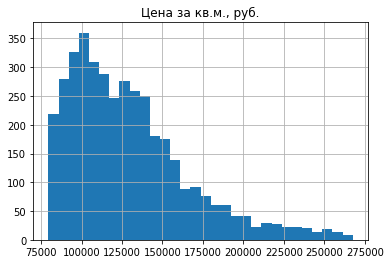

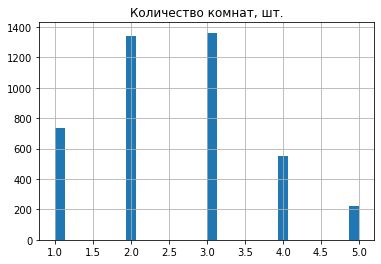

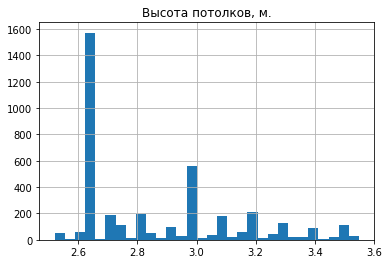

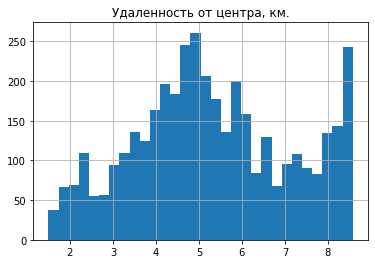

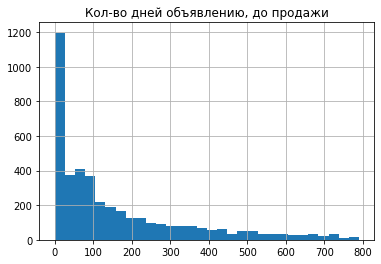

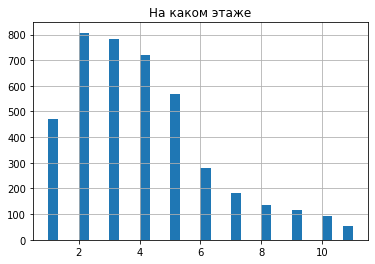

In [101]:
numb = 0
for row in flat_in_сenter:
    new_dict = ['Площадь квартиры, кв.м.', 'Цена за кв.м., руб.', 'Количество комнат, шт.', 'Высота потолков, м.', 'Удаленность от центра, км.', 'Кол-во дней объявлению, до продажи', 'На каком этаже']
    flat_in_сenter[row].hist(bins=30, range=(np.percentile(flat_in_сenter[row], 5, axis=0), np.percentile(flat_in_сenter[row], 95, axis=0)))
    plt.title(new_dict[numb])
    numb += 1
    plt.show()

Так как для визуализации разных параметров необходимо устанавливать определенные лимиты графиков и у каждого свои названия, напишем код для вывода совместных графиков для каждого параметра.

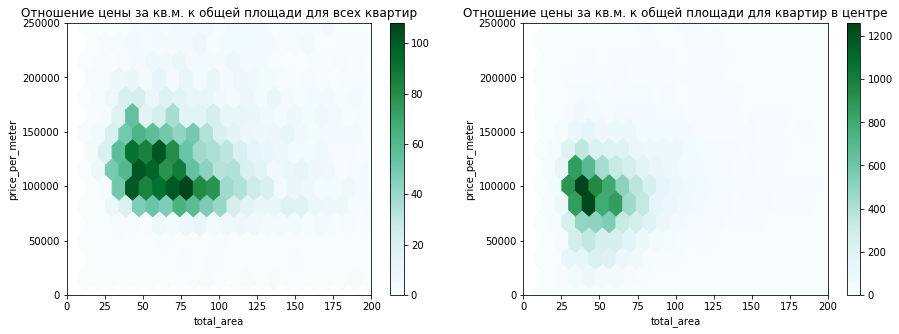

In [102]:
plt.subplots(figsize=(15,5))
flat_in_сenter.plot(x='total_area', y='price_per_meter', kind='hexbin', ax=plt.subplot(1,2,1), xlim=(0,200), ylim=(0,250000))
plt.title('Отношение цены за кв.м. к общей площади для всех квартир')
general_parameter_2.plot(x='total_area', y='price_per_meter', kind='hexbin', ax=plt.subplot(1,2,2), xlim=(0,200), ylim=(0,250000))
plt.title('Отношение цены за кв.м. к общей площади для квартир в центре')
plt.show()

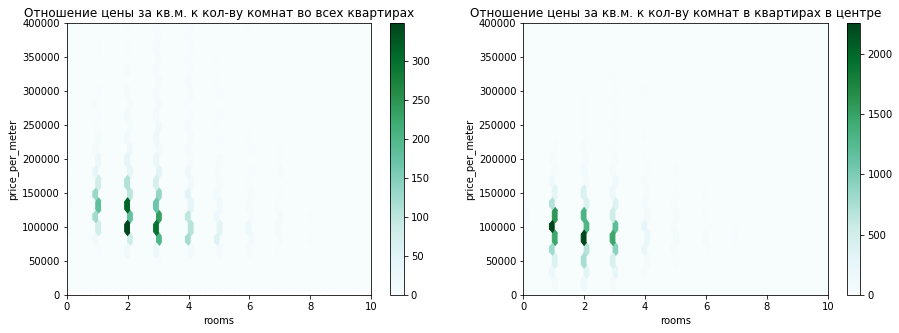

In [103]:
plt.subplots(figsize=(15,5))
flat_in_сenter.plot(x='rooms', y='price_per_meter', kind='hexbin', ax=plt.subplot(1,2,1), xlim=(0,10), ylim=(0,400000))
plt.title('Отношение цены за кв.м. к кол-ву комнат во всех квартирах')
general_parameter_2.plot(x='rooms', y='price_per_meter', kind='hexbin', ax=plt.subplot(1,2,2), xlim=(0,10), ylim=(0,400000))
plt.title('Отношение цены за кв.м. к кол-ву комнат в квартирах в центре')
plt.show()

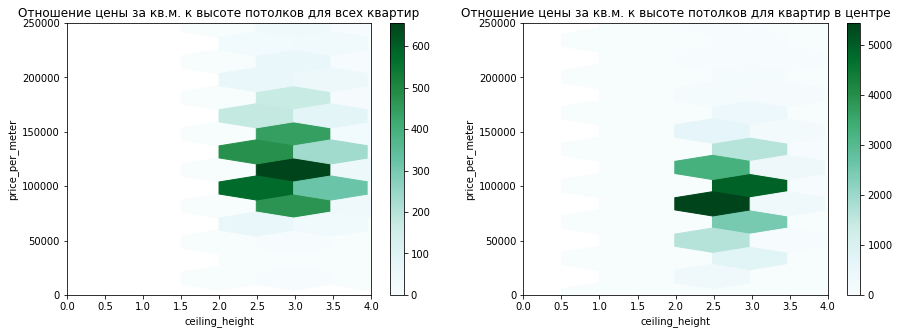

In [104]:
plt.subplots(figsize=(15,5))
flat_in_сenter.plot(x='ceiling_height', y='price_per_meter', kind='hexbin', ax=plt.subplot(1,2,1), xlim=(0,4), ylim=(0,250000))
plt.title('Отношение цены за кв.м. к высоте потолков для всех квартир')
general_parameter_2.plot(x='ceiling_height', y='price_per_meter', kind='hexbin', ax=plt.subplot(1,2,2), xlim=(0,4), ylim=(0,250000))
plt.title('Отношение цены за кв.м. к высоте потолков для квартир в центре')
plt.show()

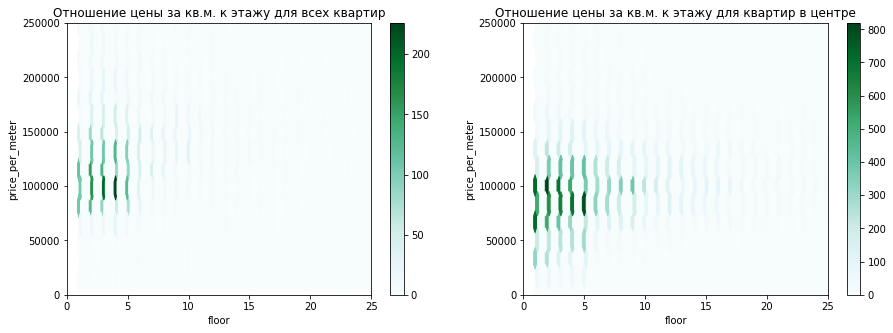

In [105]:
plt.subplots(figsize=(15,5))
flat_in_сenter.plot(x='floor', y='price_per_meter', kind='hexbin', ax=plt.subplot(1,2,1), xlim=(0,25), ylim=(0,250000))
plt.title('Отношение цены за кв.м. к этажу для всех квартир')
general_parameter_2.plot(x='floor', y='price_per_meter', kind='hexbin', ax=plt.subplot(1,2,2), xlim=(0,25), ylim=(0,250000))
plt.title('Отношение цены за кв.м. к этажу для квартир в центре')
plt.show()

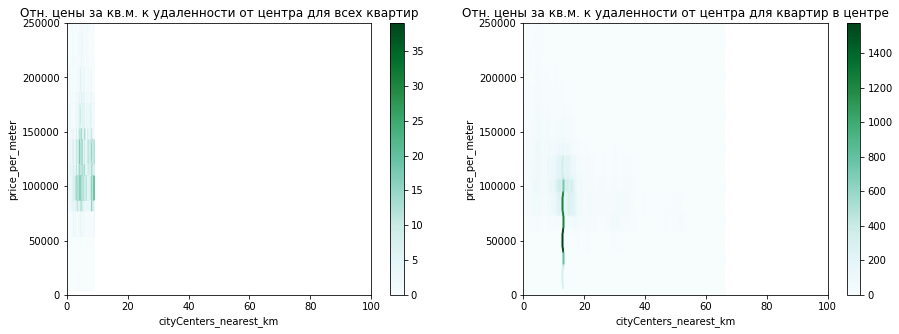

In [106]:
plt.subplots(figsize=(15,5))
flat_in_сenter.plot(x='cityCenters_nearest_km', y='price_per_meter', kind='hexbin', ax=plt.subplot(1,2,1), xlim=(0,100), ylim=(0,250000))
plt.title('Отн. цены за кв.м. к удаленности от центра для всех квартир')
general_parameter_2.plot(x='cityCenters_nearest_km', y='price_per_meter', kind='hexbin', ax=plt.subplot(1,2,2), xlim=(0,100), ylim=(0,250000))
plt.title('Отн. цены за кв.м. к удаленности от центра для квартир в центре')
plt.show()

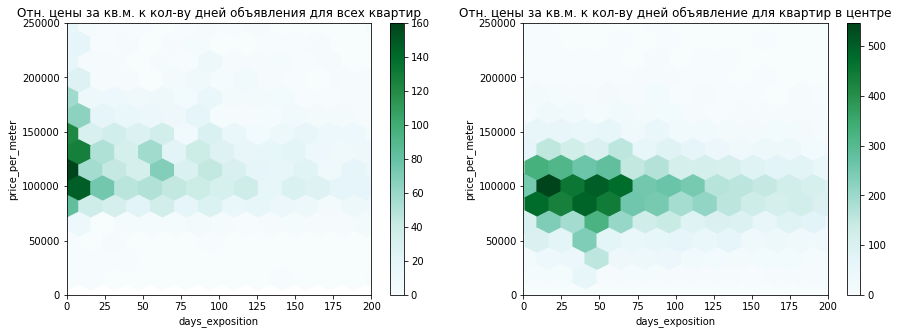

In [107]:
plt.subplots(figsize=(15,5))
flat_in_сenter.plot(x='days_exposition', y='price_per_meter', kind='hexbin', ax=plt.subplot(1,2,1), xlim=(0,200), ylim=(0,250000))
plt.title('Отн. цены за кв.м. к кол-ву дней объявления для всех квартир')
general_parameter_2.plot(x='days_exposition', y='price_per_meter', kind='hexbin', ax=plt.subplot(1,2,2), xlim=(0,200), ylim=(0,250000))
plt.title('Отн. цены за кв.м. к кол-ву дней объявление для квартир в центре')
plt.show()

<font color=green> Графики появились. Различие между центром и всеми данными теперь легко обнаружимы. 
    
---

А так же таблицу со значениями корреляции.

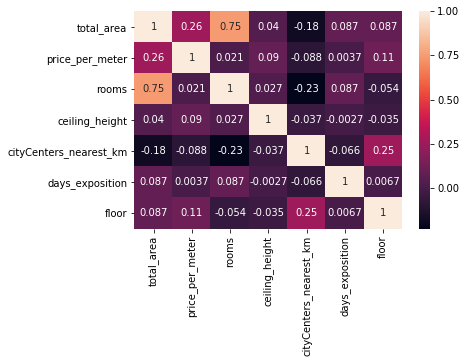

In [108]:
sns.heatmap(flat_in_сenter.corr(), annot = True)

Чтобы увидеть общую картину и для более удобного написания выводов выведем общие параметры дф.

In [109]:
flat_in_сenter.describe()

,total_area,price_per_meter,rooms,ceiling_height,cityCenters_nearest_km,days_exposition,floor
count,4404.000000,4.404000e+03,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000
mean,88.506624,1.405985e+05,2.720936,2.950656,5.270040,199.966848,4.475704
std,57.829816,8.604233e+04,1.408423,1.673895,2.125503,262.349867,3.275675
min,12.000000,1.534500e+04,0.000000,2.000000,0.181000,0.000000,1.000000
25%,53.275000,9.946400e+04,2.000000,2.650000,3.887500,21.000000,2.000000
50%,75.000000,1.220895e+05,3.000000,2.750000,5.126500,91.000000,4.000000
75%,104.500000,1.519360e+05,3.000000,3.100000,6.942500,272.000000,5.000000
max,900.000000,1.907500e+06,19.000000,100.000000,8.990000,1572.000000,25.000000


Подводя итог мы можем сказать, что среднестатистическая квартира в центре имеет:

- среднюю площадь 88.5 кв.м.

- среднюю цену за кв.м. 140598,5 руб.

- от 2-ух до 3-ёх комнат

-  высоту потолков выше, чем в среднем по городу с пригородом

Все те же зависимости наблюдаются. Чем больше площадь, тем больше цена за кв.м. Но вот с расстоянием от центра выходит интересно. Понятно, что чем меньше расстояние, тем больше цена, но тут есть еще и большая, относительно остальных, корреляция с количеством комнат. Чем меньше расстояние, тем больше комнат. Еще интересно то, что большинство квартир на низких этажах. Опять-  таки, там просто нет высоких этажей из-за старых построек.

### Шаг 5. Общий вывод

В данной работе мы провели исследовательский анализ недвижимости в г. Санкт- Петербург на сервисе Яндекс.Недвижимость.

Нам необходимо было определить общие параметры для того или иного вида условий. Мы посмотрели как выглядят среднестатистические квартиры по городу с пригородом и только центр города. Цель была понять, какие параметры могут быть реальными, а какие могут быть установлены мошенниками. 

Из нашего анализа и из парных графиков, мы увидели, какие параметры имеет среднестатистическая квартира:

- Большинство квартир находятся в домах в 15 этажей, но продают квартиры на низких этажах. Скорее всего, это связано с тем, что людей больше устраивают квартиры на низких этажах, но если квартира находится выше 5 этажа, это уже неплохо.

- Высота потолков получилась 2,6 - 2,7. Ничего особенного. Разброс в значениях высоты потолков не такой вышел и большой(при условии, что мы отсеяли потолки высотой 100 метров).

- Средняя цена за метр квадратный тоже не вызывает вопросов. 102281 руб. Обычная цена для больших городов.

- Санкт- Петербург большой город, и то, что самые частопродаваемые квартиры находятся в удалении от центра на всего 10 км. При том, что протяженность города с севера на юг 44 км, с запада на восток 25 км, так и выходим расстояние в среднем.

И в сравнении получили картину среднестатистической квартиры, которая находится в центре города:
- среднюю площадь 88.5 кв.м.
- среднюю цену за кв.м. 140598,5 руб.
- имеет от 2-ух до 3-ёх комнат
- высоту потолков выше, чем в среднем по городу с пригородом

Благодаря парным графиком мы определили сравнение квартиры по городу и квартиры в центре:

- Мы видим, что в центре площадь квартиры меньше, чем в общем объеме данных.
- Комнат в квартирах в центре меньше, чем по городу и в пригородах.
- И в центре квартиры расположены на более низких этажах.
- В центре квартиры продаются на порядок быстрее.
- В центре высота потолков ниже.

Больше всего объявлений о продаже квартир с маленькой площадью. Чем больше площадь, тем меньше вариантов. Можем предположить, что у людей в принципе во владении оказывается квартира с площадью меньше средней, потому, что процент людей, которые могут себе позволить квартиру побольше, гораздо меньше. Также мы наблюдаем пики на 45 и 60 кв.м. Можно сделать вывод, что эти квартиры находятся в зданиях, которые строят популярные застройщики и у них стандартные площади квартир по всему городу.

С помощью подобного исследования можно отсеивать ошибочные или мошеннические данные, чтобы пользователи получали только достоверную и качественную информацию.